In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('reduced_project_info.csv')
data.drop(index=0, inplace = True)
data

,Unnamed: 0,processDate,rating,finished,title,language,words,hits,kudos,comments,bookmarks,date,restricted
1,1,2020-07-29 21:35:52,1.0,1.0,Analysis of the Obvious,1.0,2751.0,9643.0,43.0,1.0,3.0,2008-09-13,0
2,2,2020-07-29 21:38:01,1.0,1.0,Dense Like Chocolate Cake,1.0,4127.0,11831.0,24.0,73.0,6.0,2008-09-13,0
3,3,2020-07-29 21:38:01,2.0,1.0,Dedication,1.0,5836.0,15812.0,25.0,57.0,6.0,2008-09-13,0
4,4,2020-07-29 21:38:01,2.0,1.0,Dedication,1.0,5836.0,4803.0,51.0,65.0,13.0,2008-09-13,0
5,5,2020-07-29 21:38:01,0.0,1.0,His Place In the Universe,1.0,1695.0,10520.0,202.0,56.0,30.0,2008-09-13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2020-07-30 00:13:46,-1.0,1.0,"Finally, Freedom",1.0,2775.0,1561.0,180.0,8.0,18.0,2014-05-28,0
999996,999996,2020-07-30 00:02:11,1.0,1.0,Let's Not Tell Dad About This,1.0,790.0,913.0,41.0,3.0,1.0,2014-05-04,0
999997,999997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
999998,999998,2020-07-30 00:15:37,1.0,1.0,Moira's Thoughts,1.0,654.0,158.0,2.0,0.0,0.0,2014-05-04,0


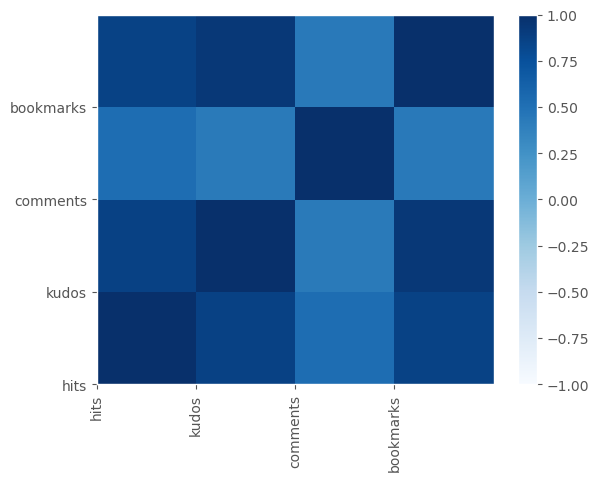

In [3]:
# Task 1 - Analyzing the Correlation Between Different Measures of Popularity

col_keep = ["hits", "kudos", "comments", "bookmarks"]

corr_data = data.copy(deep= True)

for col in corr_data.columns:
    if col not in col_keep:
        corr_data.drop(columns=[col], inplace = True)
        
corr_data = corr_data.corr()

heatmap = plt.pcolor(corr_data, cmap=plt.cm.Blues, vmin = -1, vmax = 1)
ticks = [x for x in range(0, len(corr_data.columns))]
labels = [x for x in corr_data.columns]
plt.xticks(ticks = ticks, labels = labels, rotation = 90)
plt.yticks(ticks = ticks, labels = labels)
# plot the legend on the side
plt.colorbar(heatmap)
    

So we see that kudos and bookmarks have the highest correlation, and all four types of measures of engagement are positively correlated. Comments are not as correlated with the other three measures, and thus may not be needed in a linear regression model.

In [4]:
restricted = data.groupby('restricted').count()
print(restricted.head())
56545/(943454+56545)

            Unnamed: 0  processDate  rating  finished   title  language  \
restricted                                                                
0               943454       943454  943091    943091  943089    943091   
1                56545           97      97        97      97        97   

             words    hits   kudos  comments  bookmarks    date  
restricted                                                       
0           943091  943091  943091    943091     943091  943091  
1               97      97      97        97         97      97  


0.056545056545056545

There is a small portion of fanfic authors that restrict data scraping. About 6% of authors.

In [5]:
# create data set without restricted data
useful_data = data[data['restricted']==0]
useful_data

# create correlation matrix from data factors
# establish data frame based on all current data except processDate,
corr_matrix = useful_data.drop(['Unnamed: 0','processDate','title','restricted'],axis=1)
# form correlation data from correlation data frame
correlation = corr_matrix.corr()
# create heat map
heat_map = plt.pcolor(correlation,vmin=-1,vmax=1,cmap=plt.cm.coolwarm)
plt.xticks(np.arange(0.5,len(correlation.index),1),correlation.index)
plt.yticks(np.arange(0.5,len(correlation.columns),1),correlation.columns,rotation='vertical')
plt.colorbar(heat_map)

,Unnamed: 0,processDate,rating,finished,title,language,words,hits,kudos,comments,bookmarks,date,restricted
1,1,2020-07-29 21:35:52,1.0,1.0,Analysis of the Obvious,1.0,2751.0,9643.0,43.0,1.0,3.0,2008-09-13,0
2,2,2020-07-29 21:38:01,1.0,1.0,Dense Like Chocolate Cake,1.0,4127.0,11831.0,24.0,73.0,6.0,2008-09-13,0
3,3,2020-07-29 21:38:01,2.0,1.0,Dedication,1.0,5836.0,15812.0,25.0,57.0,6.0,2008-09-13,0
4,4,2020-07-29 21:38:01,2.0,1.0,Dedication,1.0,5836.0,4803.0,51.0,65.0,13.0,2008-09-13,0
5,5,2020-07-29 21:38:01,0.0,1.0,His Place In the Universe,1.0,1695.0,10520.0,202.0,56.0,30.0,2008-09-13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,999994,2020-07-29 23:05:18,1.0,1.0,Lost in the fire (The old friends remix),1.0,1508.0,429.0,14.0,9.0,3.0,2014-05-04,0
999995,999995,2020-07-30 00:13:46,-1.0,1.0,"Finally, Freedom",1.0,2775.0,1561.0,180.0,8.0,18.0,2014-05-28,0
999996,999996,2020-07-30 00:02:11,1.0,1.0,Let's Not Tell Dad About This,1.0,790.0,913.0,41.0,3.0,1.0,2014-05-04,0
999998,999998,2020-07-30 00:15:37,1.0,1.0,Moira's Thoughts,1.0,654.0,158.0,2.0,0.0,0.0,2014-05-04,0
